# Taschenrechner

## Teil 3) Taschenrechner für komplexe Zahlen mit User-Eingabe
Implementieren Sie einen Taschenrechner für komplexe Zahlen:
- Eingabe von komplexen Zahlen
- Zugriff auf alle Rechenoperationen
- Visualisierungen der Zahlen und Rechnungen mittels Diagramme
<br>

Konzipieren Sie eine geeignete Nutzerführung mittels Textausgabe und Textkommandos. Geben Sie aussagekräftige Fehlermeldungen bei Bedienfehlern

## Komplexe Zahlen
Zuallererst benötigen wir die implementation der Komplexen Zahlen, um den Taschenrechner zu realisieren

In [28]:
#Note:
#__truediv__ and __rtruediv__ not fully implemented
#
class KomplexeZahl():
    def __init__(self,real=0,imaginaer=0):
        self.real=real
        self.imaginaer=imaginaer

    def __add__(self,other):
        if type(other)==KomplexeZahl:
            return KomplexeZahl(self.real+other.real,self.imaginaer+other.imaginaer)
        elif type(other)==int or type(other)==float:
            return KomplexeZahl(self.real+other,self.imaginaer)
        else:
            raise KomplexError

    def __sub__(self, other):
        if type(other)==KomplexeZahl:
            return KomplexeZahl(self.real-other.real,self.imaginaer-other.imaginaer)
        elif type(other)==int or type(other)==float:
           return KomplexeZahl(self.real-other,self.imaginaer)
        else:
            raise KomplexError

    def __mul__(self,other):
        if type(other)==KomplexeZahl:
            return KomplexeZahl(self.real * other.real - self.imaginaer * other.imaginaer,
                                self.real * other.imaginaer + self.imaginaer * other.real)
        elif type(other)==int or type(other)==float:
            return KomplexeZahl(self.real * other, self.imaginaer * other)
        else:
            raise KomplexError

    def __truediv__(self,other):
        if type(other) == KomplexeZahl:
            pass
        elif type(other)==int or type(other)==float:
            return KomplexeZahl(self.real / other, self.imaginaer / other)
        else:
            raise KomplexError

    def __radd__(self,other):
        if type(other)==int or type(other)==float:
            return KomplexeZahl(self.real + other, self.imaginaer)
        else:
            raise KomplexError

    def __rsub__(self,other):
        if type(other)==int or type(other)==float:
            return KomplexeZahl(other-self.real, -self.imaginaer)
        else:
            raise KomplexError

    def __rmul__(self,other):
        if type(other)==int or type(other)==float:
            return KomplexeZahl(self.real * other, self.imaginaer * other)
        else:
            raise TypeError

    def __rtruediv__(self,other):
        # TODO: implement function
        if type(other)==int or type(other)==float:
            pass
        else:
            raise KomplexError

    def __str__(self):
        return f"{self.real if self.real != 0 else ''} {'{0:{1}}i'.format(self.imaginaer, '+' if self.real else '') if self.imaginaer != 0 else ''}"  #{'+' if self.real!=0 else ''}

<hr><br> 
Implementation des Errors.

In [29]:
class KomplexError(Exception):
    pass

## Aufbau User-Eingabe
Da die Rechnung grafisch dargestellt werden soll, ist die User-Eingabe in Rechnung und Komplexe Zahlen unterteilt. <br>
Die Eingabe selbst wird erst am Ende des Kapitels ihren Platz finden, da davor die Abhängigkeiten besporchen und implementiert werden müssen.

# Definition Rechnung
Um die Rechenart zu erfassen, wird zuerst eine Fallunterscheidung benötigt. Dabei sind die vier Zeichen wie folgt definiert:
- $+$ &nbsp;&nbsp;&nbsp;&nbsp;in der Methode add()
- $-$ &nbsp;&nbsp;&nbsp;&nbsp;in der Methode sub()
- $*$ &nbsp;&nbsp;&nbsp;&nbsp;in der Methode mul()
- $/$ &nbsp;&nbsp;&nbsp;&nbsp;in der Methode div()

Die Funktionen erstellen zudem auch die grafische Darstellung der Komplexen Zahlen und eine Legende, die selbige beschreibt.

Bitte erste komplexe Zahl eingeben: 
Bitte zweite komplexe Zahl eingaben: 


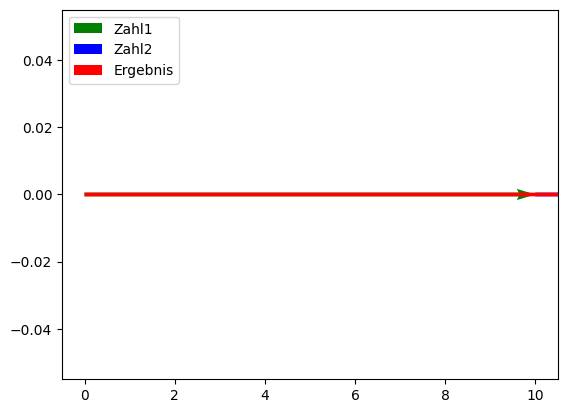

In [30]:
def add():
    zahl1=eingabe("Bitte erste komplexe Zahl eingeben: ")
    zahl2=eingabe("Bitte zweite komplexe Zahl eingaben: ")
    x=plt.quiver([0], [0], [zahl1.real], [zahl1.imaginaer], 
               color='g', scale_units='xy', scale=1, label='zahl1')
    y=plt.quiver([zahl1.real],[zahl1.imaginaer],[zahl2.real],[zahl2.imaginaer], 
               color='b',angles='xy', scale_units='xy', scale=1, label='zahl2')
    z=plt.quiver([0],[0],[zahl1.real+zahl2.real],[zahl1.imaginaer+zahl2.imaginaer],
                 color='r',angles='xy', scale_units='xy', scale=1, label='zahl2')
    plt.legend([x,y,z],['Zahl1', 'Zahl2', 'Ergebnis'], loc='upper left')
    plt.show()

add()

Bitte erste komplexe Zahl eingeben: 
Bitte zweite komplexe Zahl eingaben: 


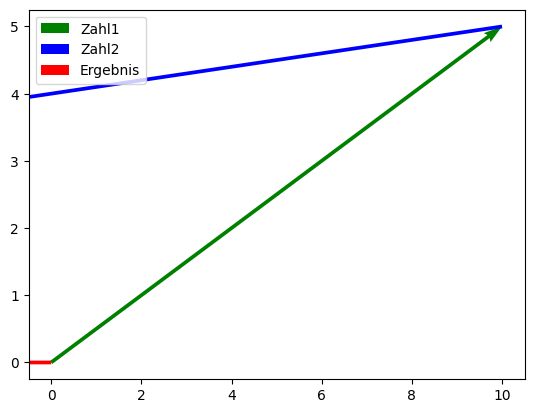

In [32]:
def sub():
    zahl1=eingabe("Bitte erste komplexe Zahl eingeben: ")
    zahl2=eingabe("Bitte zweite komplexe Zahl eingaben: ")
    x=plt.quiver([0], [0], [zahl1.real], [zahl1.imaginaer],
               color='g',angles='xy', scale_units='xy', scale=1, label='zahl1')
    y=plt.quiver([zahl1.real],[zahl1.imaginaer],[-zahl2.real],[-zahl2.imaginaer],
               color='b',angles='xy', scale_units='xy', scale=1, label='zahl2')
    z=plt.quiver([0], [0], [zahl1.real-zahl2.real], [zahl1.imaginaer-zahl2.imaginaer],
               color='r',angles='xy', scale_units='xy', scale=1,label='ergebnis')
    plt.legend([x,y,z],['Zahl1', 'Zahl2', 'Ergebnis'], loc='upper left')
    plt.show()
sub()

In [6]:
def div(ax):
    zahl1=eingabe("Bitte erste komplexe Zahl eingeben: ")
    zahl2=eingabe("Bitte zweite komplexe Zahl eingaben: ")
    x=plt.quiver([0], [0], [zahl1.real], [zahl1.imaginaer], 
               color='g',angles='xy', scale_units='xy', scale=1, label='zahl1')
    y=plt.quiver([0], [0], [zahl2.real], [zahl2.imaginaer], 
               color='b',angles='xy', scale_units='xy', scale=1, label='zahl1')
    erg=zahl1/zahl2
    z=gradiant_vector(erg.real,erg.imaginaer)
    arc=winkel(ax,erg.real,erg.imaginaer)
    plt.legend([x,y,z,arc],['Zahl1', 'Zahl2', 'Längen dividiert','Winkel subtrahiert'], loc='upper left')
    plt.show()

In [7]:
def mul(ax):
    zahl1=eingabe("Bitte erste komplexe Zahl eingeben: ")
    zahl2=eingabe("Bitte zweite komplexe Zahl eingaben: ")
    x=plt.quiver([0], [0], [zahl1.real], [zahl1.imaginaer], 
               color='g',angles='xy', scale_units='xy', scale=1, label='zahl1')
    y=plt.quiver([0], [0], [zahl2.real], [zahl2.imaginaer], 
               color='b',angles='xy', scale_units='xy', scale=1, label='zahl1')
    erg=zahl1*zahl2
    z=gradiant_vector(erg.real,erg.imaginaer)
    arc=winkel(ax,erg.real,erg.imaginaer)
    plt.legend([x,y,z,arc],['Zahl1', 'Zahl2', 'Längen multipliziert','Winkel addiert'], loc='upper left')
    plt.show()

## Eingabe Komplexe Zahlen
Im Kontrast zu den Rechnungen ist die Eingabe der Komplexen Zahlen ist etwas komplizierter, deswegen ist Sie weiter unterteilt. 
Folgend wird die Eingabe des Nutzers abgefragt und weitergegeben. Zudem werden auch Leerzeichen und andere Füllzeichen entfernt.

In [10]:
def eingabe(satz):
    print(satz)
    #später die komplexe Zahl
    komplex=None
    
    #solange die Eingabe falsch ist wiederholen
    # Replace with equality 'is'
    while komplex is None:

        #Eingabe des Nutzers
        eingabe=input()

        #Leerzeichen aus der Eingabe entfernen
        stripedeingabe=''
        for i in eingabe:
            stripedeingabe=stripedeingabe+( i if i!=' ' else '')

        #komplex wird gesetzt, falls die Eingabe richtig war,
        #sonst wird die Schleife wiederholt
        try:
            komplex=check_the_string(stripedeingabe.strip())
        except KomplexError:
            continue

        #rückgabe der Zahl
        return komplex

<hr>
Der formatierte String wird nun an die Funktion check_the_string() weitergegeben, die verschiedenste Methoden aufruft, um den String auf Richtigkeit zu überprüfen und ihn schlussendlich an rechnen() weitergibt. <br> Um die Überprüfungen zu tätigen wird hier re importiert. re steht für Regular Expression und hilft bei der Stringformatierung. <br> Zudem wird math für die Sinus, Kosinus und Power Funktion importiert.<br>
Zuletzt wird die Zahl als Komplexe Zahl zurückgegeben.

<hr><br>
check_chars() prüft, ob der String Zeichen nutzt, die für die Rechnung nicht benötigt werden.
Dabei wird jedes Zeichen auf alle verwendbaren Zeichen überprüft.

In [11]:
import re
import math
def check_the_string(string):
#string="2pi+isin(2pi)"
#fehler string="2"
    #string="i"
    check_chars(string)

    string = check_double(string)

    string = check_bracket_standard(string)

    string = re.sub(r"sin","Sin",string)

    check_i_sin_cos(string)

    string = check_pi(string)

    check_brackets(string)
    #Checkfirstchar(string)

    string = standardize_i(string)
    #klammern auflösen
    getclamps=re.compile(r"\(([0-9\.a-zA-Z\+\-\*\/\^\$\_]*?)\)")
    komplex=None
    geti=re.compile(r"[\+\-]?(.+?)(?=[\+\-]?)")
    while True:
        clamps=re.search(getclamps,string)
        supstring=re.sub(getclamps,'_',string,count=1)
        if(supstring!=string):


            #klammer beinhaltet i
            if(re.search(r"(?<![sScC])[iI]",clamps.group(1))!=None or re.search(r"\$",clamps.group(1))!=None):
                check_i_bracket(supstring)
                komplex=re.sub(r"[iI]","(i)",clamps.group(1),count=1)
                try:
                    #hier
                    komplex=rechnen(komplex,KomplexeZahl(0,1))
                except:
                    print("etwas ist schiefgelaufen")
                    raise KomplexError
                string=re.sub(r"\_","$",supstring,count=1)

            #klammer ohne i
            else:

                try:
                    erg=rechnen(clamps.group(1))
                except:
                    print("etwas ist schiefgelaufen")
                    raise KomplexError

                string=bracket_handler(supstring,erg)

        else:
            #keine Kalmmer mehr,die Schleife wird verlassen
            break

    if(komplex==None):
        komplex=re.sub(r"[iI]","(i)",string,count=1)
        try:
            komplex=rechnen(komplex,KomplexeZahl(0,1))
        except:
            print("etwas ist schiefgelaufen")
            raise KomplexError
    else:
        string=re.sub(r"\$","(i)",string,count=1)
        try:
            komplex=rechnen(string,komplex)
        except:
            print("etwas ist schiefgelaufen")
            raise KomplexError
    #komplex ist die zahl
    return komplex if type(komplex)==KomplexeZahl else KomplexeZahl(komplex,0)

In [12]:
def check_chars(string):
    #auf falsche Zeichen prüfen
    checkchars=re.compile(r"[0-9sSiInpPcCo\(\)\+\*\-\/\.\^]")
    for i in string:
        if(re.search(checkchars,i)==None):
            print("falsche Zeichen benutzt",i)
            raise KomplexError

<hr><br> 
check_double() prüft auf doppelte Vorzeichen und ersetzt sie.

In [13]:
def check_double(string):
    
    string=re.sub(r"(?:\+\-)|(?:\-\+)","-",string)

    string=re.sub(r"(?:\+\+)|(?:\-\-)","+",string)
    return string

<hr><br>
check_bracket_standard() prüft, ob bei Klammern die Kurzschreibweise genutzt wurde und fügt normalisiert sie gegebenenfalls.

In [14]:
def check_bracket_standard(string):
    
    string=re.sub(r"(?<=[0-9iI\)])\(","*(",string)

    string=re.sub(r"(?=[0-9iIsScC])\)",")*",string)
    return string

<hr><br>check_i_sin_cos() prüft ob die restlichen Buchstaben namentlich <b>s</b>,<b>c</b>, <b>n</b>,<b>o</b> und <b>i</b> richtig benutzt wurden und es nur ein <b>i</b> (imaginäre Einheit) gibt.

In [15]:
def check_i_sin_cos(string):
    #auf i,s,p,c,o prüfen
    checki=re.compile(r".*[iI].*[iI].*")
    checksin=re.compile(r"[sS]in\((.+?)\)")
    checkpi=re.compile(r"[pP]i")
    checkcos=re.compile(r"[cC]os\((.+?)\)")
    istring=re.sub(checksin,'€',string)
    istring=re.sub(checkpi,'_',istring)
    istring=re.sub(checkcos,'&',istring)
    if(re.fullmatch(checki,istring)!=None):
        print("zu viele i werte vorhanden")
        raise KomplexError
    if(re.search(r"[sSpPcCo]",istring)!=None):
        print("s,p,c,o falsch benutzt")
        raise KomplexError


<hr><br> 
check_pi() prüft ob die Kurzschreibweise mit $pi$ verwendet wurde und ein $mal$ hinzugefügt werden muss.
Da später anhand von Rechenzeichen die Komplexe Zahl auf die normale Schreibweise gebracht wird. Zudem wird $pi$ in eine annährende Kommazahl umgewandelt.

In [16]:
def check_pi(string):
    #pi normieren und auflösen
    prepi=re.search(r"([0-9])[pP]i",string)
    while(prepi!=None):
        string=re.sub(r"[0-9][pP]i",(prepi.group(1)+"*pi"),string)
        prepi=re.search(r"([0-9])[pP]i",string)
    
    postpi=re.search(r"[pP]i([0-9])",string)
    while(postpi!=None):
        string=re.sub(r"[pP]i[0-9]",("pi*"+postpi.group(1)),string)
        postpi=re.search(r"[pP]i([0-9])",string)
    string=re.sub(r"[pP]i","3.14159265",string)
    return string

<hr><br>
check_brackets() prüft, ob die Anzahl der öffnenden Klammern auf die Anzal der schliesenden Klammern passt.

In [17]:
def check_brackets(string):
    #auf klammern prüfen
    klammern=0
    for i in string:
        if(i=='('):
            klammern+=1
        elif(i==')'):
            klammern-=1
    if(klammern!=0):
        print("klammern sind falsch gesetzt")
        raise KomplexError

<hr><br>
check_first_char() ist eine veraltete Prüfung, ob der String mit einem vorzeichen beginnt. Da es aber auch möglich ist, dass eine Klammer mit vorzeichen beginnt und die Funktion Probleme mit Strings der Länge 1 hatte, wurde diese Überprüfung verschoben.

In [18]:
def check_first_char(string):
    #falsch
    #auf richtiges verwenden von vorzeichen an erster stelle prüfen
    checkneg=re.compile(r"([+-]?)(?(1)(\(|sin\(|i|cos\(|[0-9])|$)(.+)")
    if(re.fullmatch(checkneg,string)==None):    #and len(string)>1
        print("schlechte vorzeichensetzung")
        raise KomplexError

<hr><br>
standardize_i() prüft wie check_pi() darauf, ob die Kürzung für $i$ genutzt wurde. Zudem wird geprüft, ob $i$ alleinestehend ist.

In [19]:
def standardize_i(string):
    #i standartisieren
    checksti=re.compile(r"([0-9\)])[iI](?![sn])")
    getsti=re.search(checksti,string)
    if(getsti!=None):
        string=re.sub(checksti,f'{getsti.group(1)}*i',string,count=1)
    checksti2=re.compile(r"(?<![sScC])[iI]([0-9\(Sc])")
    getsti2=re.search(checksti2,string)
    if(getsti2!=None):
        string=re.sub(checksti2,f'i*{getsti2.group(1)}',string,count=1)
    #nicht sicher ob es wichtig ist
    checkonlyi=re.compile(r"(\*)?[iI](?(1)(?:\*)?|\*)")
    if(re.search(checkonlyi,string)==None):
        string=re.sub(r"[iI](?![sn])",'1*i',string,count=1)
    return string

<hr><br>

check_i_bracket() prüft, ob $i$ manipuliert wird. Verboten ist
- $sin(i)$
- $cos(i)$
- $i^2$

In [20]:
def check_i_bracket(supstring):
    #i mit speziellen Klammern und Potenzen prüfen
    checksin2=re.compile(r"[sS]in_")
    checkcos2=re.compile(r"[cC]os_")
    checkpow2=re.compile(r"(\^)?_(?(1)\^?|\^)")
    if(re.search(checksin2,supstring)!=None):
        print("sin darf nicht mit i benutzt werden")
        raise KomplexError
    elif(re.search(checkcos2,supstring)!=None):
        print("cos darf nicht mit i benutzt werden")
        raise KomplexError
    elif(re.search(checkpow2,supstring)!=None):
        print("i darf nicht potenziert werden")
        raise KomplexError


<hr><br>

bracket_handler() überprüft nach dem ausrechnen einer Klammer, ob das Ergebnis noch weiter manipuliert werden muss, beispielsweise durch $sin$.

In [21]:
def bracket_handler(supstring,erg):
    #wie mit dem Ergebnis der Klammer umgegangen werden soll
    string=''
    if(re.search(r"[sS]in_",supstring)!=None):
        neg=0
        if(re.search(r"\-[sS]in\_",supstring)!=None):
            neg=1
        supstring=re.sub(r"[\+\-]?[sS]in\_","_",supstring,count=1)
        if(neg==1):
            erg=-math.sin(erg)
        else:
            erg=math.sin(erg)
        erg=round(erg,7)
        string=re.sub(r"\_",f"{erg:+}",supstring,count=1)
    elif(re.search(r"[cC]os_",supstring)!=None):
        neg=0
        if(re.search(r"\-[cC]os\_",supstring)!=None):
            neg=1
        supstring=re.sub(r"[\+\-]?[cC]os\_","_",supstring,count=1)
        if(neg==1):
            erg=-math.cos(erg)
        else:
            erg=math.cos(erg)
        erg=round(erg,7)
        string=re.sub(r"\_",f"{erg:+}",supstring,count=1)
    else:
        string=re.sub(r"\_",f"{erg}",supstring,count=1)
    return string

# Rechnen
Die rechnen() Funktion erhält einen String, und wahlweise eine komplexe Zahl. Die Rechnung wird rekursiv ausgeführt und gibt dann das Ergebnis entweder als Komplexe Zahl oder als $float$ Wert zurück.

In [22]:
def rechnen(str, komplex=None):
    if(str[0]=="+" or str[0]=="-"):
        str="0"+str
    rechn=None
    if(str=="(i)"):
        return komplex
    str=re.sub(r"(?<=[\*\/\^])[\+]","&",str)
    str=re.sub(r"(?<=[\*\/\^])[\-]","€",str)
    erg=re.split(r"[\+\-](?!.*[\+\-])",str,maxsplit=1)
    rechn=re.search(r"[\+\-](?!.*[\+\-])",str)
    str=re.sub(r"(?<=[\*\/\^])[\&]","+",str)
    str=re.sub(r"(?<=[\*\/\^])[\€]","-",str)
    if(len(erg)==2):
        erg[0]=re.sub(r"(?<=[\*\/\^])[\&]","+",erg[0])
        erg[1]=re.sub(r"(?<=[\*\/\^])[\&]","+",erg[1])
        erg[0]=re.sub(r"(?<=[\*\/\^])[\€]","-",erg[0])
        erg[1]=re.sub(r"(?<=[\*\/\^])[\€]","-",erg[1])
        erg[0]=rechnen(erg[0],komplex)
        erg[1]=rechnen(erg[1],komplex)
    else:
        erg[0]=re.sub(r"(?<=[\*\/\^])[\&]","+",erg[0])
        erg[0]=re.sub(r"(?<=[\*\/\^])[\€]","-",erg[0])
        erg=re.split(r"[\*\/](?!.*[\*\/])",erg[0],maxsplit=1)
        rechn=re.search(r"[\*\/](?!.*[\*\/])",str)
        if(len(erg)==2):
            erg[0]=rechnen(erg[0],komplex)
            erg[1]=rechnen(erg[1],komplex)
        else:
            erg=re.split(r"\^",erg[0])
            tmperg=float(erg[0])
            del(erg[0])
            for i in erg:
                tmperg=float(math.pow(tmperg,float(i)))
            erg=tmperg
    #print("erg",erg,"rechn",rechn,"str",str)
    if(type(erg)==float):
        return erg
    else:
        rechn=rechn.group(0)
        if(rechn=="+"):
            return (erg[0]+erg[1])
        elif(rechn=="-"):
            return (erg[0]-erg[1])
        elif(rechn=="*"):
            return (erg[0]*erg[1])
        elif(rechn=="/"):
            if(erg[1]==0):
                print("Durch Null teilen ist nicht möglich")
                raise KomplexError
            return (erg[0]/erg[1])
        else:
            return erg[0]
            #....
     #formel mit (i) als komplexer zahl
     #besitzt keine klammern,sin,cos,pi,freie i
     #kein ^ mit i
     #wichtig - am anfang ist möglich

# Grafische Oberfläche
Um die Zahlen und die Rechnung grafisch darzustellen, wird Matplotlib mit numpy benutzt.<br>
setplot() erstellt eine Standart-Oberfläche in Form eines Koordinatensystems in dem dann die Rechnung abgebildet wird.

In [23]:
import numpy as np                 # v 1.19.2
import matplotlib.pyplot as plt    # v 3.3.2

def setplot():
    # Select length of axes and the space between tick labels
    xmin, xmax, ymin, ymax = -10, 10, -10, 10
    ticks_frequency = 1
    
    # Plot points
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Set identical scales for both axes
    ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')
    
    # Set bottom and left spines as x and y axes of coordinate system
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Create 'x' and 'y' labels placed at the end of the axes
    ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
    ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)
    
    # Create custom major ticks to determine position of tick labels
    x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
    y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
    ax.set_xticks(x_ticks[x_ticks != 0])
    ax.set_yticks(y_ticks[y_ticks != 0])
    
    # Create minor ticks placed at each integer to enable drawing of minor grid
    # lines: note that this has no effect in this example with ticks_frequency=1
    ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
    ax.set_yticks(np.arange(ymin, ymax+1), minor=True)
    
    # Draw major and minor grid lines
    ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)
    
    # Draw arrows
    arrow_fmt = dict(markersize=4, color='black', clip_on=False)
    ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
    ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)
    return ax

# Darstellung
Es folgen noch zwei Funktionen, die bei der Darstellung helfen.

gradiant_vector() stellt einen zweifarbigen Vektor dar, der mit der Multiplikation der Länge der anderen beiden Vektoren definiert ist.

In [24]:
from matplotlib.colors import LinearSegmentedColormap
def gradiant_vector(x,y):
    # Define the starting point and vector components
    x0, y0 = 0, 0  # Starting point (origin)
    U, V = x,y  # Vector components (U: x-component, V: y-component)
    
    # Number of segments along the arrow (including tip)
    num_segments = 10
    
    # Create a linearly spaced set of points along the vector (for the color gradient)
    x_vals = np.linspace(x0, x0 + U, num_segments)
    y_vals = np.linspace(y0, y0 + V, num_segments)
    
    # Calculate the magnitude at each point
    magnitude = np.sqrt(x_vals**2 + y_vals**2)
    
    # Plot segments of the vector with varying shades of green based on the magnitude*
    
    for i in range(1, num_segments-1,2):
        plt.plot([x_vals[i-1], x_vals[i]], [y_vals[i-1], y_vals[i]], 
                 color='g', linewidth=3)
    
    # Optionally: Add the entire arrow with a color gradient
    vec=plt.quiver(x0, y0, U, V, angles='xy', scale_units='xy', scale=1, color='b', width=0.005)
    
    return vec

<hr><br>
winkel() stellt einen Winkel dar, der durch die Addition der beiden Winkel der anderen Zahlen definiert ist.

In [25]:
import matplotlib.patches as patches

def winkel(ax,V,U):
    # Calculate the angle in radians and convert to degree
    angle_rad = np.arctan2(U,V)  # Angle between vector and x-axis in radians
    angle_deg = np.degrees(angle_rad)  # Convert to degrees
    
    # Draw the arc representing the angle
    arc = patches.Arc((0,0), width=2, height=2, angle=0, theta1=0, theta2=angle_deg, color='black', lw=2, linestyle='--')
    ax.add_patch(arc)
    return arc

# User-Eingabe
Schlussendlich kommt noch die User-Eingabe. Erst muss die Rechnung eingegeben werden, von der aus das Programm dann die jeweilige Funktion aufruft, die dann über die Eingabe der zwei Komplexen Zahlen eine Rechnung durchführt und schlussendlich grafisch darstellt.

Welche Rechnung möchtest du durchführen(+-*/): 


KeyboardInterrupt: Interrupted by user

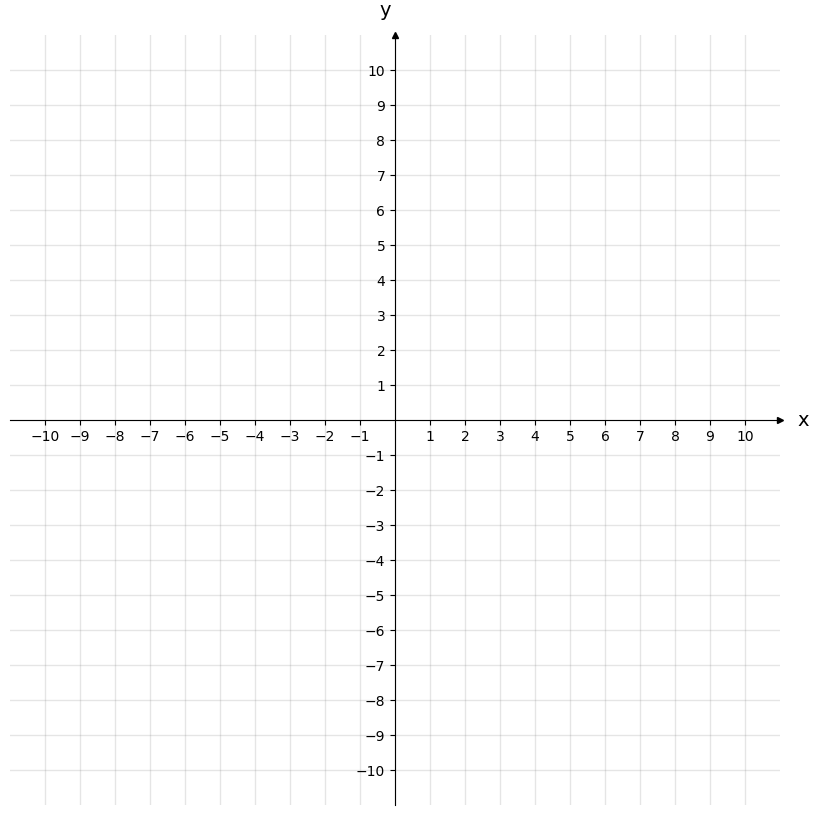

In [26]:
ax=setplot()
print("Welche Rechnung möchtest du durchführen(+-*/): ")
operator= input()
match operator:
    case "+":
        add()
    case "-":
        sub()
    case "/":
        div(ax)
    case "*":
        mul(ax)
    case _:
        print(f"{operator} ist keine gültige Eingabe")
#2/3*(-4^-2+-sin(5)i)
#2.5*(cos(4)+sin(3)i)
#2(cos(30pi/180)+isin(30pi/180))